In [284]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [285]:
def read_img(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img)
    img = tf.image.rgb_to_grayscale(img)
    img = tf.image.convert_image_dtype(img, tf.float32, saturate=False)
    return img
    
image = read_img("./data/11f3bd8.png")

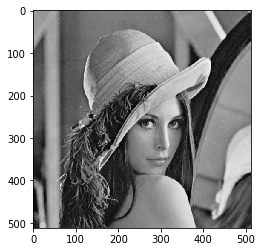

In [286]:
plt.imshow(tf.squeeze(image), cmap=plt.cm.gray)
plt.show()

In [287]:
def gaussian_blur(img, kernel_size, sigma):
    def gaussian_filter(channels = 1):
        kernel_1D = tf.range(-kernel_size // 2 + 1.0, (kernel_size // 2) + 1.0)
        xx, yy = tf.meshgrid(kernel_1D, kernel_1D)
        
        kernel = tf.exp(-(xx ** 2 + yy ** 2) / (2.0 * sigma ** 2))
        kernel = kernel / tf.reduce_sum(kernel)
        kernel = tf.tile(kernel[..., tf.newaxis], [1, 1, channels])
        return kernel
    
    gaussian_kernel = gaussian_filter(tf.shape(img)[-1])
    return gaussian_kernel[..., tf.newaxis]

In [288]:
gaussian_kernel = gaussian_blur(image, 7, 3)
gaussian_image = tf.nn.conv2d(image[tf.newaxis, ...], gaussian_kernel, strides=1, padding='SAME')

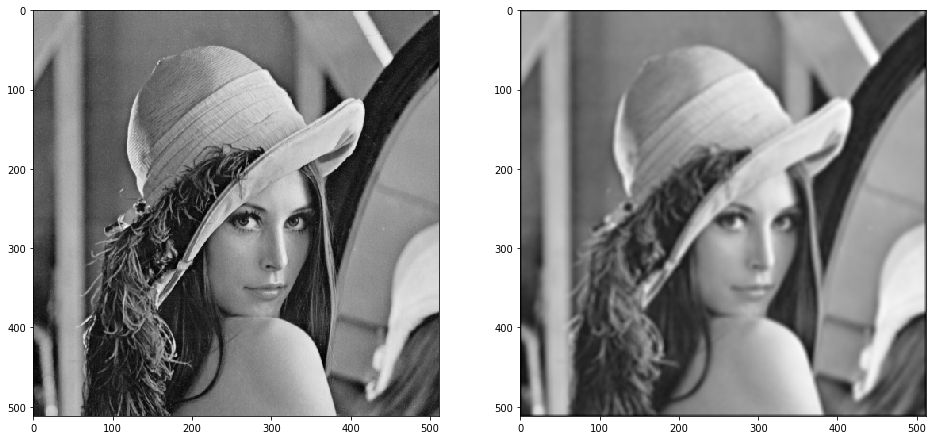

In [289]:
fig, ax = plt.subplots(1, 2, figsize=(16, 16))
ax[0].imshow(tf.squeeze(image), cmap=plt.cm.gray)
ax[1].imshow(tf.squeeze(gaussian_image), cmap=plt.cm.gray)
plt.show()

In [300]:
def sobel_edge_detection(image, kernel):
    kernel_x = kernel[..., tf.newaxis, tf.newaxis] # Assumption is image will be always in grayscale
    kernel_y = tf.transpose(kernel)[..., tf.newaxis, tf.newaxis]
    
    grad_x = tf.nn.conv2d(input=image, filters=kernel_x, strides=1, padding='SAME')
    grad_y = tf.nn.conv2d(input=image, filters=kernel_y, strides=1, padding='SAME')
    
    gradient_magnitude = tf.sqrt(tf.square(grad_x) + tf.square(grad_y))
    gradient_magnitude *= 255.0 / tf.reduce_max(gradient_magnitude)
    
    gradient_direction = tf.math.atan2(grad_y, grad_x)
    gradient_direction = tf.divide(gradient_direction)
    print(gradient_direction)
    
    return grad_x, grad_y, gradient_magnitude

In [301]:
sobel_kernel = tf.constant([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], tf.float32)

grad_x, grad_y, magnitude = sobel_edge_detection(gaussian_image, sobel_kernel)

tf.Tensor(
[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]], shape=(1, 512, 512, 1), dtype=float32)


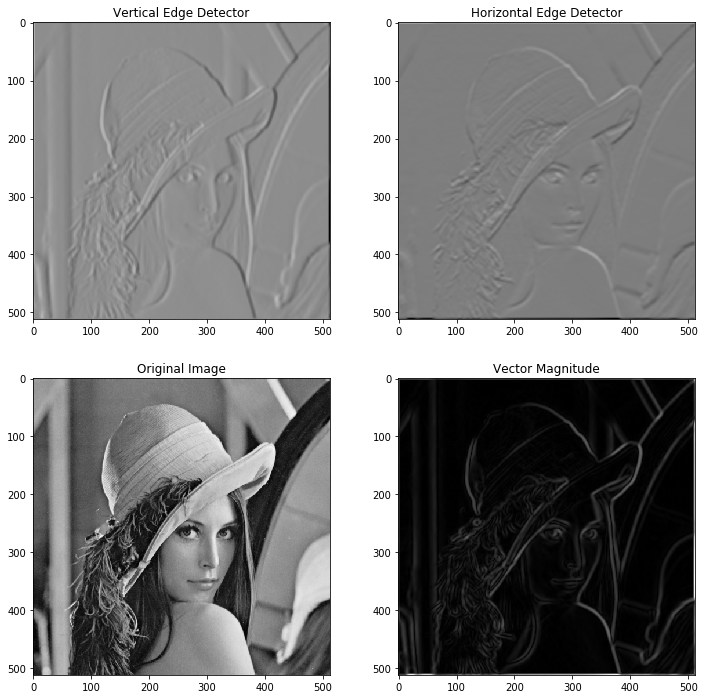

In [281]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
ax[0, 0].imshow(tf.squeeze(grad_x), cmap=plt.cm.gray)
ax[0, 0].set_title("Vertical Edge Detector")
ax[0, 1].imshow(tf.squeeze(grad_y), cmap=plt.cm.gray)
ax[0, 1].set_title("Horizontal Edge Detector")
ax[1, 0].imshow(tf.squeeze(image), cmap=plt.cm.gray)
ax[1, 0].set_title("Original Image")
ax[1, 1].imshow(tf.squeeze(magnitude), cmap=plt.cm.gray)
ax[1, 1].set_title("Vector Magnitude")
plt.show()